# Лабораторная работа №9. Дифференцирование и интегрирование

### Лодочникова Владлена. Группа №5130901/10202

### Упражнение 9.1

Прочитали и запустили блокнот chap09.ipynb. 
Некоторые примеры не работают с апериодическими сигналами, проверим так ли это. 
Заменим периодический пилообразный сигнал на непериодичные данные Facebookи посмотрим, что пойдет не так. 

Ответ:

Если заменим периодический пилообразный сигнал на непериодичные данные, такие как данные Facebook, то могут возникнуть некоторые проблемы.

Во-первых, для непериодических сигналов нельзя вычислить частоту или период, поэтому нельзя будет использовать методы анализа, основанные на этих параметрах.

Во-вторых, непериодические сигналы могут иметь более сложную структуру, чем периодические сигналы. Это означает, что для анализа непериодических сигналов могут потребоваться более сложные методы, такие как вейвлет-анализ или анализ рекуррентных сетей.

В-третьих, непериодические сигналы могут иметь шумы и искажения, которые могут затруднить анализ. В этом случае может потребоваться применить методы фильтрации или очистки сигнала перед анализом.

В целом, анализ непериодических сигналов может быть более сложной задачей, чем анализ периодических сигналов, и может потребоваться использовать более сложные методы и подходы. 

### Упражнение 9.2

Изучим влияние diff и differentiate на сигнал. Для этого создадим треугольный сигнал и напечаем его.

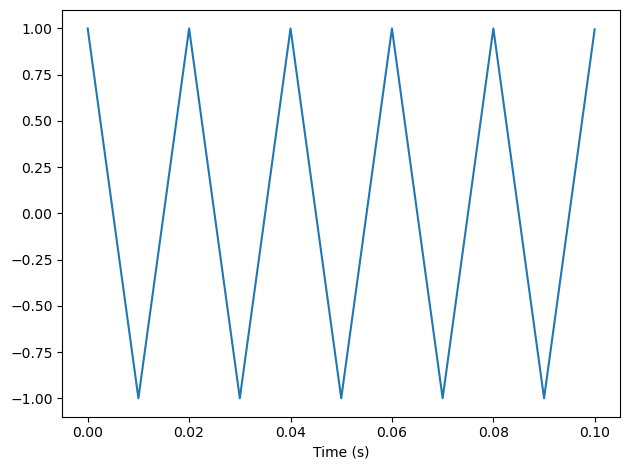

In [1]:
from thinkdsp import TriangleSignal
from thinkdsp import decorate
import matplotlib.pyplot as plt

in_wave = TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

Разность двух треугольных волн дает прямоугольную волну. Гармоники прямоугольной волны убывают пропорционально 1/f, в то время как гармоники треугольной волны убывают пропорционально 1/f^2. Это связано с тем, что прямоугольная волна имеет более резкие изменения, чем треугольная волна, что приводит к более медленному убыванию гармоник. 

Теперь применим diff к сигналу и напечатаем результат.

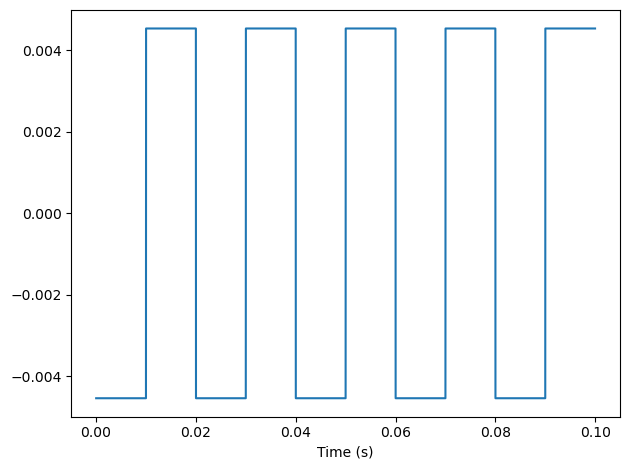

In [2]:
out_wave = in_wave.diff()
out_wave.plot()
decorate(xlabel='Time (s)')

После применения операции дифференцирования к исходному сигналу, мы получили прямоугольный сигнал. Это означает, что дифференцирование преобразовало исходный сигнал в прямоугольный. 

Далее вычислим спектр треульного сигнала, применим differentiate и напечатаем результат.

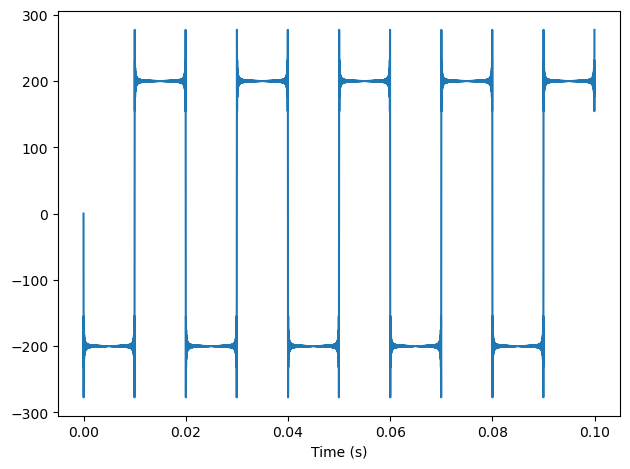

In [3]:
out_wave2 = in_wave.make_spectrum().differentiate().make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

В целом, метод differentiate является более точным и предпочтительным для вычисления производной сигнала, в то время как метод diff может быть использован для вычисления приближенной производной или разности между соседними отсчетами сигнала.

### Упражнение 9.3

Изучим влияние cumsum и integrate на сигнал. Для этого создадим прямоугольный сигнал и напечаем его. Вычислим спектр прямоугольного сигнала, применим integrate и напечатаем результат. 

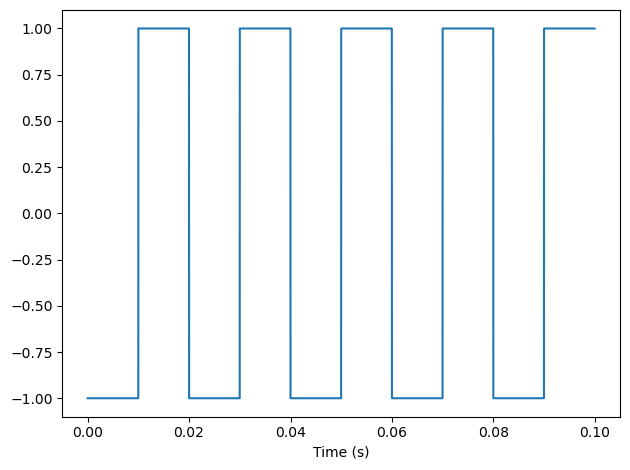

In [5]:
from thinkdsp import SquareSignal

in_wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

Применим cumsum и напечатаем результат.

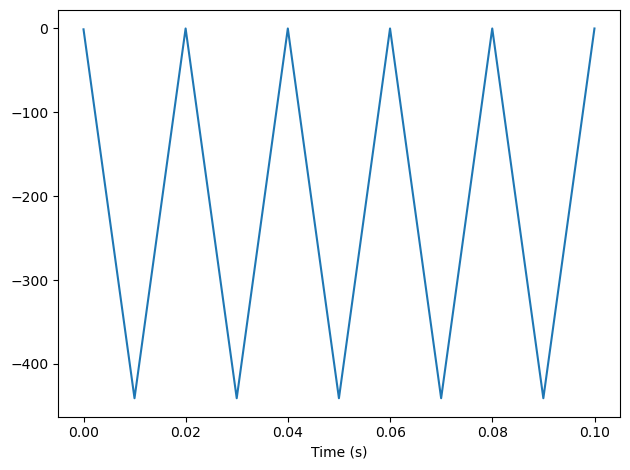

In [6]:
out_wave = in_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

Спектральный интеграл также имеет форму треугольной волны, но его амплитуда значительно отличается от амплитуды исходной треугольной волны. Это означает, что спектральный интеграл имеет ту же форму, что и исходная волна, но с другим значением амплитуды.

 Вычислим спектр прямоугольного сигнала, применим integrate и напечатаем результат.

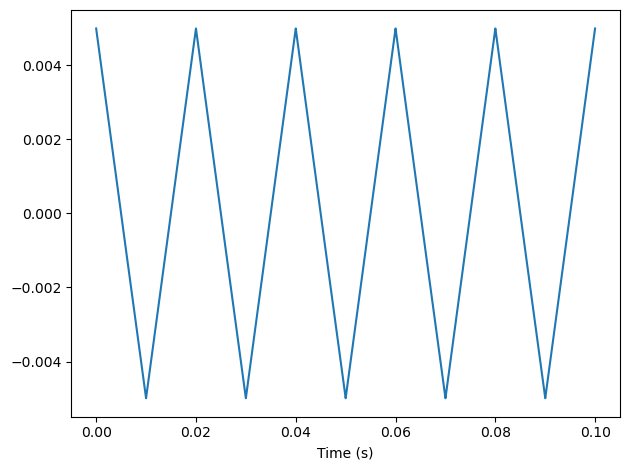

In [7]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Визуально нормализованные волны выглядят похожими друг на друга. 

### Упражнение 9.4

Изучим влиянени двойного интегрирования. Создадим пилообразный сигнал, вычислим его спектр, а затем дважды применим integrate. Напечатаем результирующий сигнал и его спектр. 

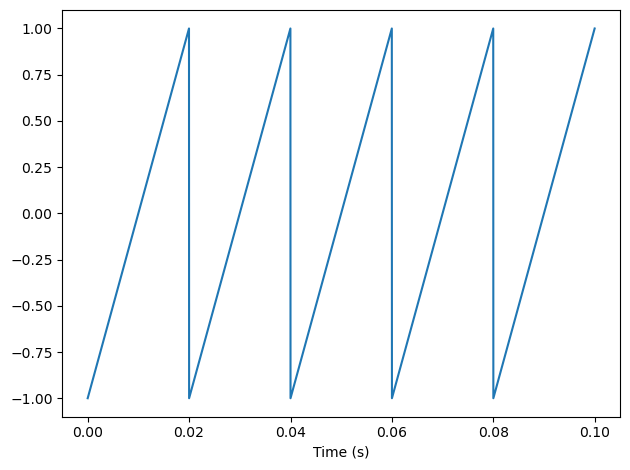

In [9]:
from thinkdsp import SawtoothSignal

in_wave = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

Первая кумулятивная сумма пилообразного сигнала представляет собой параболическую кривую. Это означает, что при применении операции кумулятивной суммы к пилообразному сигналу получается парабола.

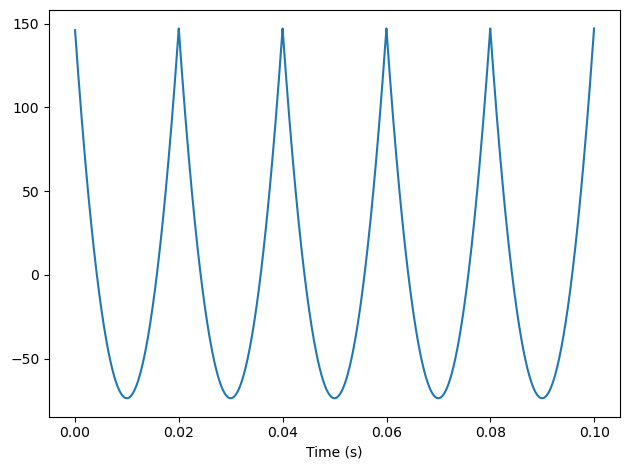

In [10]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()
decorate(xlabel='Time (s)')

Вторая кумулятивная сумма представляет собой кубическую кривую: 

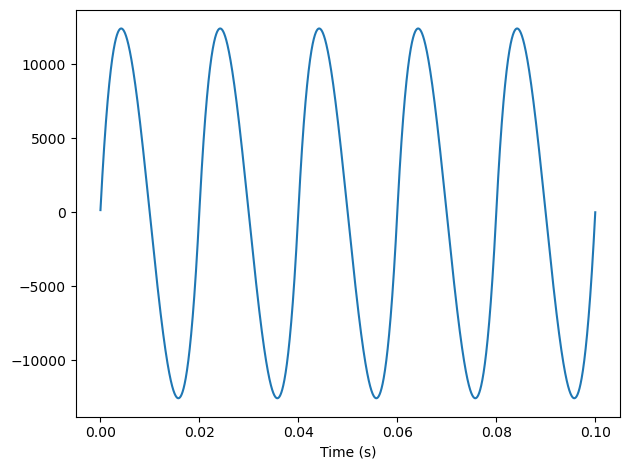

In [11]:
out_wave = out_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

Проверем, что произойдет, если дважды применим integrate.


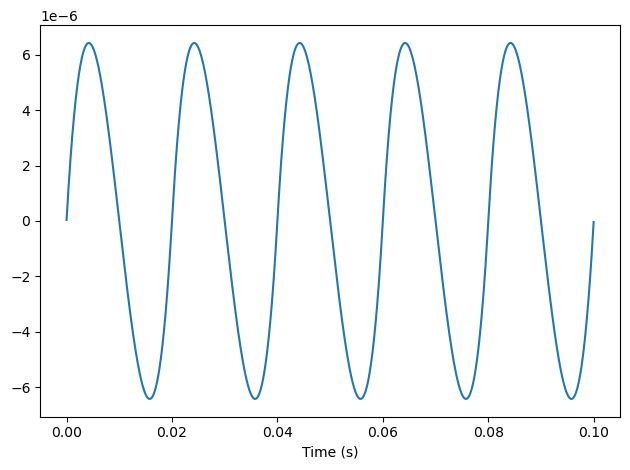

In [12]:
spectrum = in_wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Интегрирование сигнала дважды дает кривую, которая имеет форму кубической функции.

При многократном интегрировании сигнала, он начинает приобретать все более и более синусоидальную форму. 

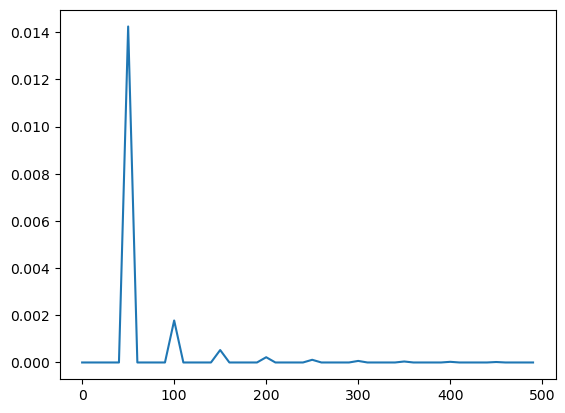

In [13]:
out_wave2.make_spectrum().plot(high=500)

Сигнал напоминает форму синусоиду потому, что интеграл работает как фильтр низких частот, отфильтровывая большинство неосновных частот, как видно на спектре. В результате, сигнал становится более гладким и гармоничным. 

### Упражнение 9.5

Изучим влияние второй разности и второй производной. Создадим CubicSignal. Вычислим вторую разность, дважды применив diff. Вычислим вторую производную, дважды применив differentiate к спектру. 

Для начала построим кубический сигнал:



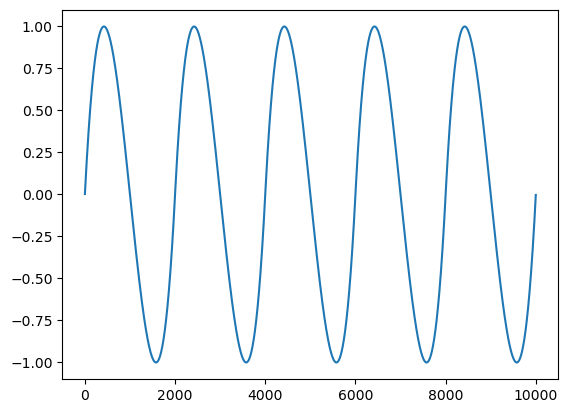

In [14]:
from thinkdsp import CubicSignal

in_wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

 Вычислим вторую разность, дважды применив diff:

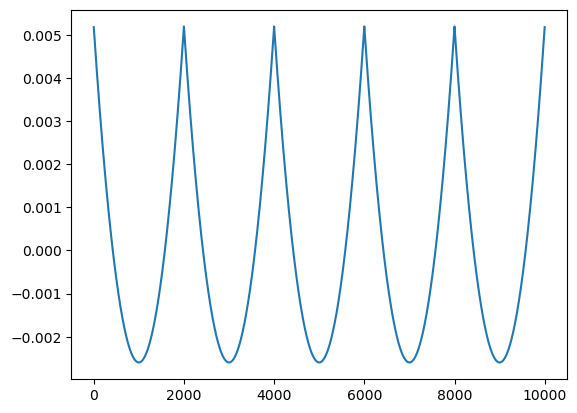

In [15]:
out_wave = in_wave.diff()
out_wave.plot()

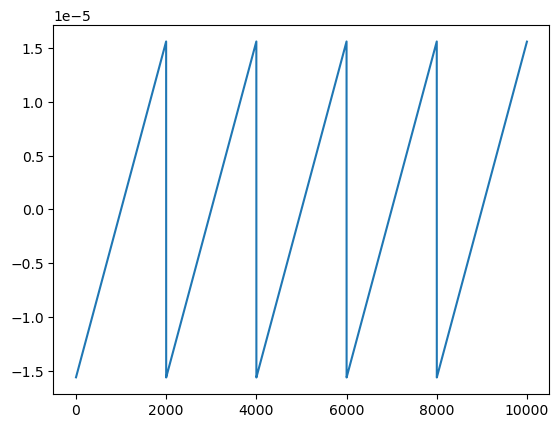

In [16]:
out_wave = out_wave.diff()
out_wave.plot()

При применении операции разности к пилообразному сигналу, получается парабола, а при повторном применении операции разности к полученной параболе, получается пилообразная волна.

Вычислим вторую производную, дважды применив differentiate к спектру. 

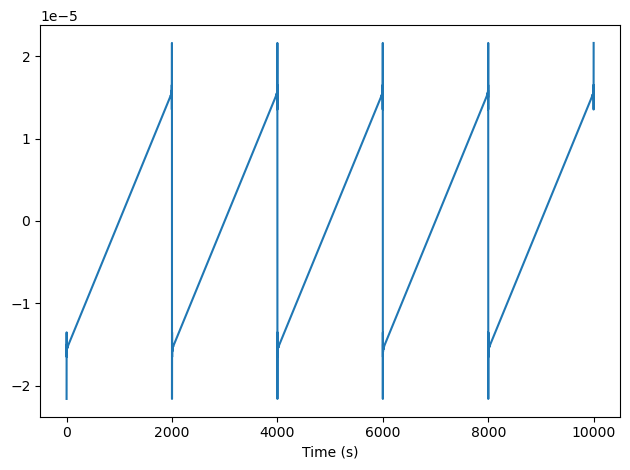

In [17]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

При дифференцировании пилообразного сигнала дважды, получается пилообразная форма с некоторым звоном. Это связано с тем, что производная параболического сигнала не определена в некоторых точках, что приводит к появлению звона в сигнале.